### 네이버 얼굴 인식(CFR)

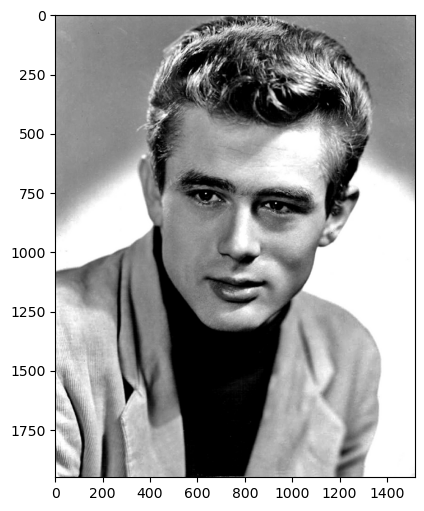

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("./datas/face_detection1.jpg")
plt.figure(figsize=(8, 6))  #그래프 크기 확대
plt.imshow(img)
plt.show()

In [1]:
import requests
import json

client_id = "r6qI_94FASAJ5Tc7gDGO"
client_secret = "K1NBHzZ43n"

url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴 인식(일치 확률)
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url,  files=files, headers=headers)
# print(response.text)
# print(type(response.text))  #str(문자열)

parsed = json.loads(response.text)
# print(parsed)
# print(type(parsed)) # 파이썬 딕셔너리

# 딕셔너리를 json.dumps() 처리하여 json 데이터로 저장함
# confidence는 일치함
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1518,
            "height": 1950
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "정우성",
                "confidence": 0.25246
            }
        }
    ]
}


In [3]:
import requests
import json

client_id = "r6qI_94FASAJ5Tc7gDGO"
client_secret = "K1NBHzZ43n"

url = "https://openapi.naver.com/v1/vision/face"  #마지막 경로 - face 
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url,  files=files, headers=headers)

detect_result = json.loads(response.text)
detect_result

{'info': {'size': {'width': 1518, 'height': 1950}, 'faceCount': 1},
 'faces': [{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678},
   'landmark': {'leftEye': {'x': 634, 'y': 746},
    'rightEye': {'x': 952, 'y': 797},
    'nose': {'x': 760, 'y': 981},
    'leftMouth': {'x': 625, 'y': 1105},
    'rightMouth': {'x': 902, 'y': 1133}},
   'gender': {'value': 'male', 'confidence': 0.999999},
   'age': {'value': '26~30', 'confidence': 0.160886},
   'emotion': {'value': 'neutral', 'confidence': 0.999995},
   'pose': {'value': 'frontal_face', 'confidence': 0.995792}}]}

In [4]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [5]:
detect_result['faces']  #roi : rectangle of information

[{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678},
  'landmark': {'leftEye': {'x': 634, 'y': 746},
   'rightEye': {'x': 952, 'y': 797},
   'nose': {'x': 760, 'y': 981},
   'leftMouth': {'x': 625, 'y': 1105},
   'rightMouth': {'x': 902, 'y': 1133}},
  'gender': {'value': 'male', 'confidence': 0.999999},
  'age': {'value': '26~30', 'confidence': 0.160886},
  'emotion': {'value': 'neutral', 'confidence': 0.999995},
  'pose': {'value': 'frontal_face', 'confidence': 0.995792}}]

In [7]:
detect_result['faces'][0]['roi']  # faces 키가 리스트형

{'x': 467, 'y': 617, 'width': 678, 'height': 678}

In [8]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999999}

In [9]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999995}

In [10]:
detect_result.values()

dict_values([{'size': {'width': 1518, 'height': 1950}, 'faceCount': 1}, [{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678}, 'landmark': {'leftEye': {'x': 634, 'y': 746}, 'rightEye': {'x': 952, 'y': 797}, 'nose': {'x': 760, 'y': 981}, 'leftMouth': {'x': 625, 'y': 1105}, 'rightMouth': {'x': 902, 'y': 1133}}, 'gender': {'value': 'male', 'confidence': 0.999999}, 'age': {'value': '26~30', 'confidence': 0.160886}, 'emotion': {'value': 'neutral', 'confidence': 0.999995}, 'pose': {'value': 'frontal_face', 'confidence': 0.995792}}]])

In [23]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
# print(x, y, w, h)
emotion, emo_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()
# 사진 위에 얼굴 정보 출력
annotation = f"{gender}:{gen_confidence}\n{emotion}:{emo_confidence}\n{age}:{age_confidence}"
print(annotation)

male:0.999999
neutral:0.999995
26~30:0.160886


### 얼굴 인식 정보 출력
### 인식된 얼굴 사진에 박스 넣기

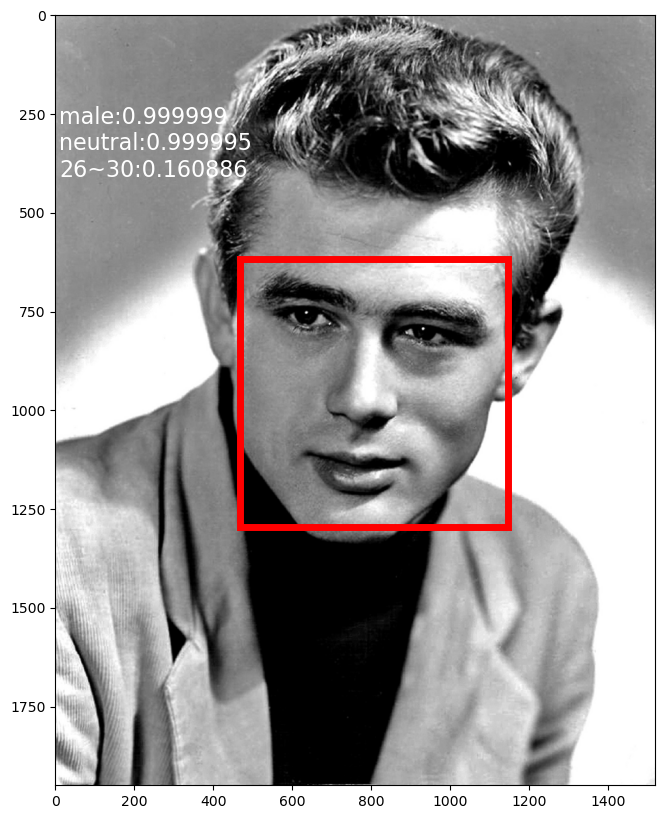

In [29]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

client_id = "r6qI_94FASAJ5Tc7gDGO"
client_secret = "K1NBHzZ43n"

url = "https://openapi.naver.com/v1/vision/face"  #마지막 경로 - face 
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url,  files=files, headers=headers)

detect_result = json.loads(response.text)
detect_result

detect_result.keys()
detect_result['faces'] 
detect_result['faces'][0]['roi']

# values()로 값을 받고 그 값을 개수에 맞춰 각 변수에 저장함
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
# print(x, y, w, h)
emotion, emo_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()
# 사진 위에 얼굴 정보 출력
annotation = f"{gender}:{gen_confidence}\n{emotion}:{emo_confidence}\n{age}:{age_confidence}"
# print(annotation)

img = mpimg.imread("./datas/face_detection1.jpg")
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

# 얼굴 인식 박스 그리기(linewidth-선 굵기, edgecolor-테두리색, facecolor-채움색)
rect_face = patches.Rectangle((x, y), w, h,
                              linewidth=5,
                              edgecolor='red',
                              facecolor='none')
ax.add_patch(rect_face)
#plt.text()는 사진에 글자를 입력하는 함수
plt.text(10, 400, annotation, wrap=True, color='white', fontsize='16')
plt.show()

### 유명인 얼굴 인식 일치 확률 구현

{
    "info": {
        "size": {
            "width": 1518,
            "height": 1950
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "정우성",
                "confidence": 0.261002
            }
        }
    ]
}


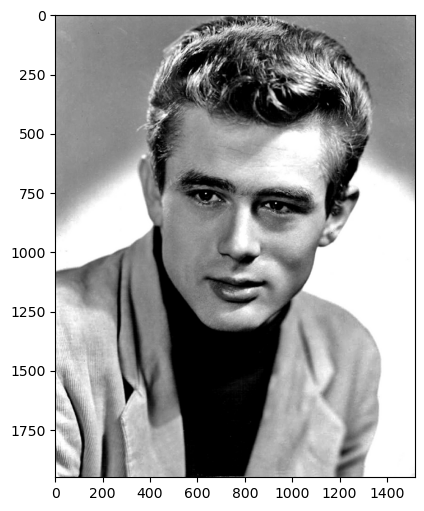

In [30]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

client_id = "r6qI_94FASAJ5Tc7gDGO"
client_secret = "K1NBHzZ43n"

url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴 인식(일치 확률)
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url,  files=files, headers=headers)
# print(response.text)
# print(type(response.text))  #str(문자열)

parsed = json.loads(response.text)
# print(parsed)
# print(type(parsed)) # 파이썬 딕셔너리

# 딕셔너리를 json.dumps() 처리하여 json 데이터로 저장함
# confidence는 일치함
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

img = mpimg.imread("./datas/face_detection1.jpg")
plt.figure(figsize=(8, 6))  #그래프 크기 확대
plt.imshow(img)
plt.show()